2025-09-02 05:04:05.963805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756789446.327767      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756789446.433784      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1756789476.136692      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756789476.137315      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


I0000 00:00:1756789482.576399      85 service.cc:148] XLA service 0x7d7e28007910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756789482.578051      85 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756789482.578080      85 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756789482.865944      85 cuda_dnn.cc:529] Loaded cuDNN version 90300


   22/11553 ━━━━━━━━━━━━━━━━━━━━ 1:26 8ms/step - loss: 0.0362 

I0000 00:00:1756789484.116963      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11553/11553 ━━━━━━━━━━━━━━━━━━━━ 67s 5ms/step - loss: 6.2011e-04 - val_loss: 6.7687e-05
Epoch 2/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 4.2127e-05 - val_loss: 1.0741e-05
Epoch 3/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 4.0620e-05 - val_loss: 3.4094e-05
Epoch 4/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 4.0092e-05 - val_loss: 5.4344e-06
Epoch 5/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 3.9629e-05 - val_loss: 2.5825e-05
Epoch 6/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 3.9327e-05 - val_loss: 1.3919e-05
Epoch 7/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 3.8979e-05 - val_loss: 8.0756e-05
Epoch 8/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 3.9201e-05 - val_loss: 9.9278e-06
Epoch 9/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - loss: 3.9111e-05 - val_loss: 9.2893e-07
Epoch 10/15
11553/11553 ━━━━━━━━━━━━━━━━━━━━ 62s 5ms/step - loss: 3.9343e-05 - val_loss: 1.6843e-05
Epoch 11/15
11553/11

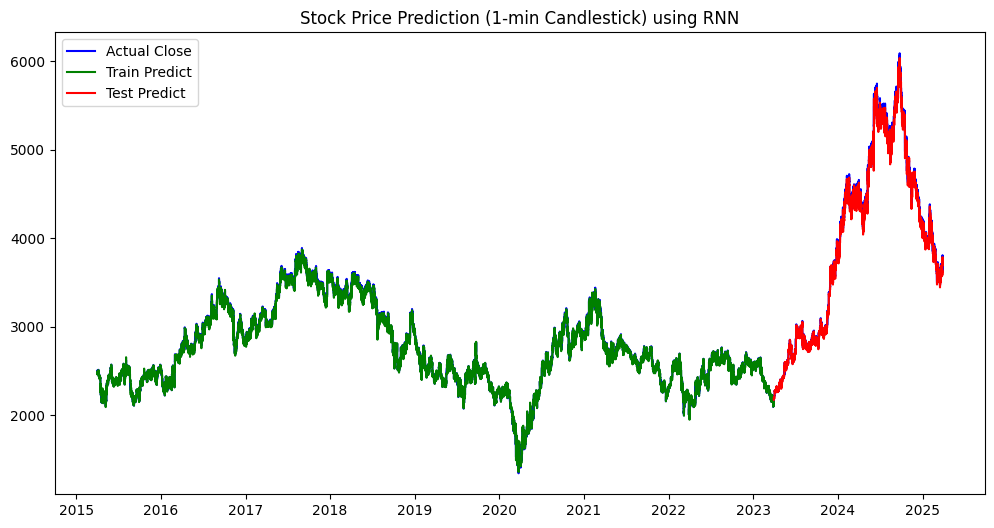

Test RMSE: 31.172323545484538


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# ------------------------
# Load 1-Min Candlestick Data
# ------------------------
df = pd.read_csv("/kaggle/input/heromoto/0098_HEROMOTOCO.csv")  # Format: Date,Open,High,Low,Close,Volume
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use OHLCV data as features
data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values

# ------------------------
# Data Preprocessing
# ------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Train-Test Split (80-20)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences
def create_sequences(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step])       # past time_step minutes
        y.append(dataset[i+time_step, 3])      # predict Close price (index 3)
    return np.array(X), np.array(y)

time_step = 60  # last 60 minutes → predict next minute
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# ------------------------
# Build RNN Model
# ------------------------
model = Sequential()
model.add(SimpleRNN(units=64, return_sequences=False, input_shape=(time_step, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer (next Close price)

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# ------------------------
# Train Model
# ------------------------
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# ------------------------
# Predictions
# ------------------------
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
# Trick: only inverse transform Close column
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]  # reuse scaler params

train_predict = close_scaler.inverse_transform(train_predict)
y_train_actual = close_scaler.inverse_transform(y_train.reshape(-1, 1))

test_predict = close_scaler.inverse_transform(test_predict)
y_test_actual = close_scaler.inverse_transform(y_test.reshape(-1, 1))

# ------------------------
# Plot Results
# ------------------------
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Actual Close", color="blue")
plt.plot(df.index[time_step:train_size], train_predict, label="Train Predict", color="green")
plt.plot(df.index[train_size+time_step:], test_predict, label="Test Predict", color="red")
plt.legend()
plt.title("Stock Price Prediction (1-min Candlestick) using RNN")
plt.show()

# ------------------------
# Evaluate
# ------------------------
rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print("Test RMSE:", rmse)
